# Assignment - Advanced Regression

#### Business Goal


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Import all necessary Libraries

In [4345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Fetch Dataset

In [4346]:
#fetching data
df = pd.read_csv("C:/Users/Hitesh/Desktop/Assignments/Machine Learning 2/Module 5 Assignment/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 1 - EDA

Steps Included-

1. Inspecting Dataset
2. Drop attributes with high NULL percentage.
3. Imputing missing values.
4. Univariate and Bivariate anaysis.
5. Convert Years to age.
6. Convert Ordinal Categories to Numeric data.
7. Convert non-ordinal numeric objects to non-numeric data.
8. Inspect Outliers and skewness
9. Drop Columns with highly imbalanced data
10. Merging weaker categories in one stronger category for categorical data.
11. Dummify categorical data

Inspect Dataset

In [4347]:
df.shape

(1460, 81)

In [4348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4349]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Check and drop Duplicates if any

In [4350]:
df.drop_duplicates(subset='Id')
df.shape

(1460, 81)

Check for NULL Percentage

In [4351]:
# Check for percentage of missing values
round(100*(df.isnull().sum())/len(df), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

Check everything having NULL Percentage greater than 40

In [4352]:
#Check for NULL percentage greater than 40%
null_greater_40pct_chk2=round(100*(df.isnull().sum()/len(df.index)),2)>40.0
null_greater_40pct_chk2

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   



Impute Missing Values, 

Removing attributes with High Bias, 

skewness Check 

and variable transformation from Year to Age

Now from definition of FireplaceQu, we know that this field is not missing at Random so rather than dropping it, impute missing values with NA

In [4353]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [4354]:
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan, 'NA')

Since FireplaceQu is a Ordinal Category, change it to Ordinal Numbers

In [4355]:
df['FireplaceQu'] = df['FireplaceQu'].map( {'Ex':5, 'Gd':4, 'TA':3 , 'Fa':2 , 'Po':1 , 'NA':0})

Check again for the left out columns having NULL percentage greater than 40.

Now from above we know that these left out columns having high NULL Percentage, it wont help in retaining those even though these are not missing at random.

In [4356]:
null_count = round(df.isnull().sum() / len(df),2)
missing_values = null_count[(null_count > 0.40)].index
missing_values

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [4357]:
# Drop all the columns with high NULL percentage 

null_count = round(df.isnull().sum() / len(df),2)
missing_values = null_count[(null_count > 0.40)].index
df.drop(missing_values, axis=1, inplace=True)

In [4358]:
df.shape

(1460, 77)

Check for remaining NULL Attributes

In [4359]:
#Check for NULL percentage greater than 40%
i = 0
percent_NA = 0
for i in df.columns:
    percent_NA = round(100*(df[i].isnull().sum()/len(df.index)),2)
    if percent_NA>0:
        print(i,' ',percent_NA)

LotFrontage   17.74
MasVnrType   0.55
MasVnrArea   0.55
BsmtQual   2.53
BsmtCond   2.53
BsmtExposure   2.6
BsmtFinType1   2.53
BsmtFinType2   2.6
Electrical   0.07
GarageType   5.55
GarageYrBlt   5.55
GarageFinish   5.55
GarageQual   5.55
GarageCond   5.55


Create new columns for  all the Year related attributes to Age and drop the Original columns

In [4360]:
import datetime
now = datetime.datetime.now()

df['GarageYrBlt_Age']=df.apply(lambda x: now.year - x['GarageYrBlt'], axis=1)
df['YrSold_Age']=df.apply(lambda x: now.year - x['YrSold'], axis=1)
df['YearBuilt_Age']=df.apply(lambda x: now.year - x['YearBuilt'], axis=1)
df['YearRemodAdd_Age']=df.apply(lambda x: now.year - x['YearRemodAdd'], axis=1)

In [4361]:
df.drop(['Id','GarageYrBlt','YrSold','YearBuilt','YearRemodAdd'], axis=1, inplace=True)

Impute Missing Values for Continuous Variable

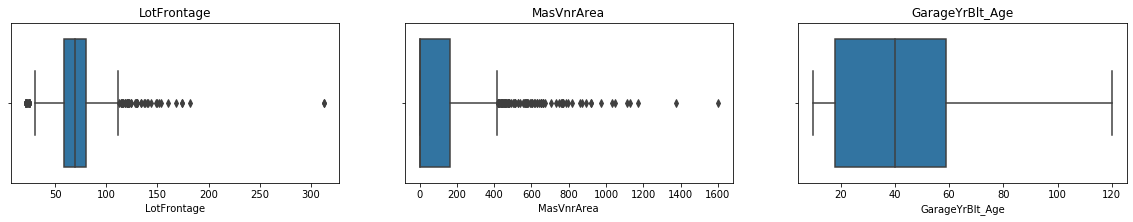

In [4362]:
plt.figure(figsize=(20,10))

plt.subplot(3, 3, 1)
plt.title("LotFrontage")
sns.boxplot(df['LotFrontage'])

plt.subplot(3, 3, 2)
plt.title("MasVnrArea")
sns.boxplot(df['MasVnrArea'])

plt.subplot(3, 3, 3)
plt.title("GarageYrBlt_Age")
sns.boxplot(df['GarageYrBlt_Age'])

MasVnrArea and GarageYrBlt_Age are not missing at random, so can not be replaced by Median. Hence replacing with -1 is good idea here because these missing values are meaningful missing values.

LotFrontage can be replaced with Median as its MAR

In [4363]:
df.loc[pd.isnull(df['MasVnrArea']),['MasVnrArea']]=-1
df.loc[pd.isnull(df['LotFrontage']),['LotFrontage']]=df['LotFrontage'].median()
df.loc[pd.isnull(df['GarageYrBlt_Age']),['GarageYrBlt_Age']]=-1

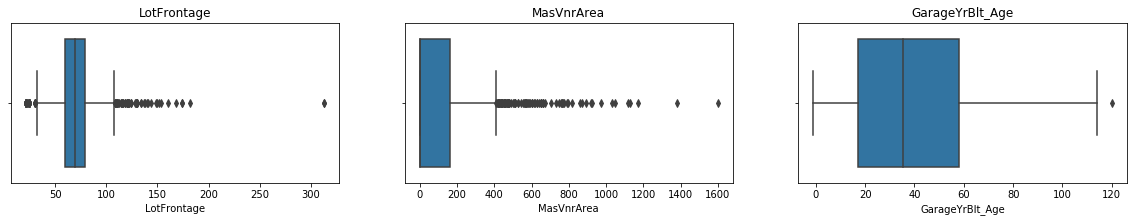

In [4364]:
plt.figure(figsize=(20,10))

plt.subplot(3, 3, 1)
plt.title("LotFrontage")
sns.boxplot(df['LotFrontage'])

plt.subplot(3, 3, 2)
plt.title("MasVnrArea")
sns.boxplot(df['MasVnrArea'])

plt.subplot(3, 3, 3)
plt.title("GarageYrBlt_Age")
sns.boxplot(df['GarageYrBlt_Age'])

Impute Missing Values for all the Categorical Variables

Check the distribution of Categotical variable

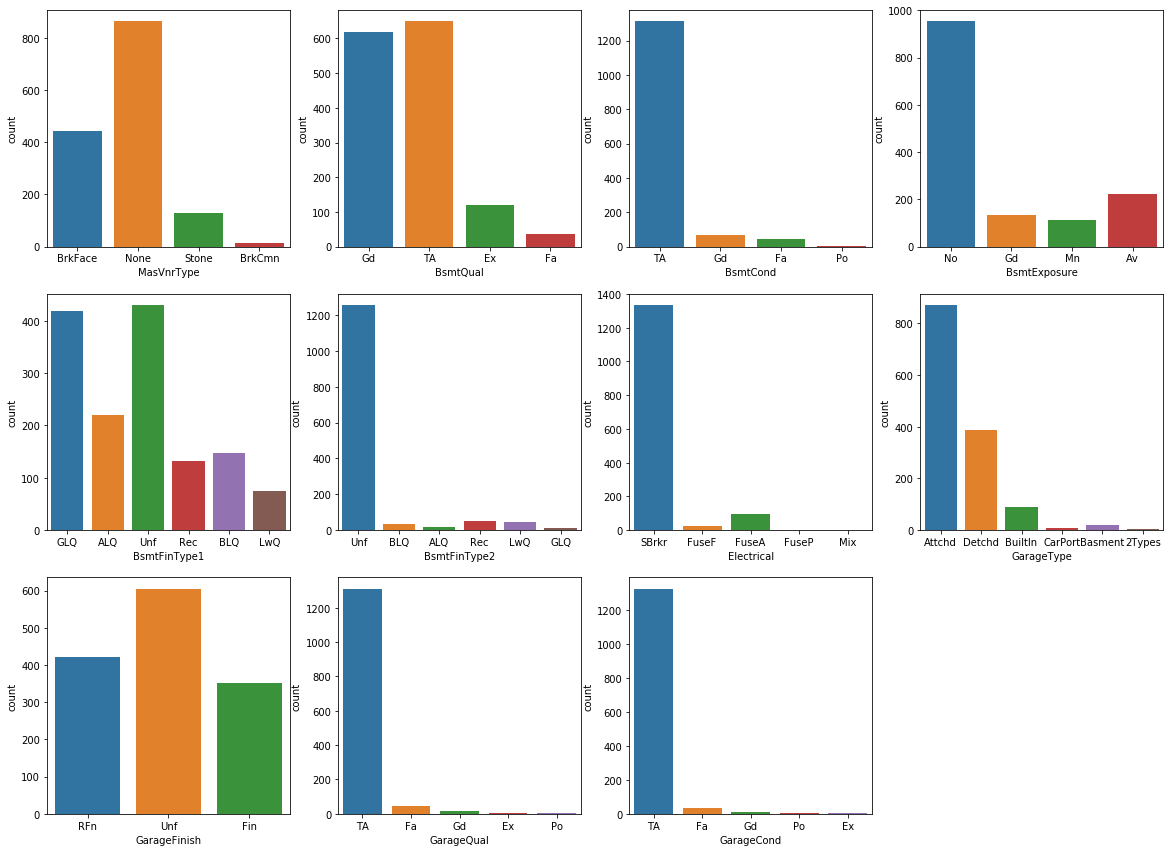

In [4365]:
plt.figure(figsize=(20,20))
i = 0
j=1
percent_NA = 0
for i in df.columns:
    percent_NA = round(100*(df[i].isnull().sum()/len(df.index)),2)
    if percent_NA>0:
        #print(i,' ',percent_NA)
        plt.subplot(4, 4,j)
        #plt.title(i)
        sns.countplot(df[i])
        j=j+1

Drop Categorical columns with highly biased categories (Greater than 90% to single Class)

In [4366]:
df.drop(['BsmtCond','Electrical','BsmtFinType2','GarageQual','GarageCond'], axis=1, inplace=True)

Check for remaning attributes with NULL

In [4367]:
i = 0
percent_NA = 0
for i in df.columns:
    percent_NA = round(100*(df[i].isnull().sum()/len(df.index)),2)
    if percent_NA>0:
        print(i,' ',percent_NA)

MasVnrType   0.55
BsmtQual   2.53
BsmtExposure   2.6
BsmtFinType1   2.53
GarageType   5.55
GarageFinish   5.55


Impute Missing Values for MasVnrType with Mode as its MAR

In [4368]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

Impute Missing Values for remaining attributes with NA as these are meaningful missing values and can not be imputed by Mode

In [4369]:
df["BsmtQual"].fillna("NA", inplace = True)
df["BsmtExposure"].fillna("NA", inplace = True)
df["BsmtFinType1"].fillna("NA", inplace = True)
df["GarageType"].fillna("NA", inplace = True)
df["GarageFinish"].fillna("NA", inplace = True)

In [4370]:
df.shape

(1460, 71)

Check skewness of continuous columns.

From SkyPy Org -

cipy.stats.skew(a, axis=0, bias=True)

Computes the skewness of a data set.

For normally distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

Check Skewness Greater than 2

In [4371]:
skew_chk = df.skew(axis = 0, skipna = True,numeric_only=True)
skew_chk_grt_2 = skew_chk[skew_chk>2].to_frame()
skew_chk_grt_2 = pd.DataFrame(skew_chk_grt_2).reset_index()
skew_chk_grt_2.columns = ['attribute', 'skewness']
skew_chk_grt_2

,attribute,skewness
0,LotFrontage,2.409147
1,LotArea,12.207688
2,MasVnrArea,2.677538
3,BsmtFinSF2,4.255261
4,LowQualFinSF,9.011341
5,BsmtHalfBath,4.103403
6,KitchenAbvGr,4.488397
7,OpenPorchSF,2.364342
8,EnclosedPorch,3.089872
9,3SsnPorch,10.304342


Plot and check Highly Skewed columns from above step having skewnesss Greater Than 2

Here we would not drop any attribute with High Skewness and having Outliers.

Reason: Let Lasso and Ridge Penalize such attributes in later stage as data in real can be highly skewed and model should learn on the data given

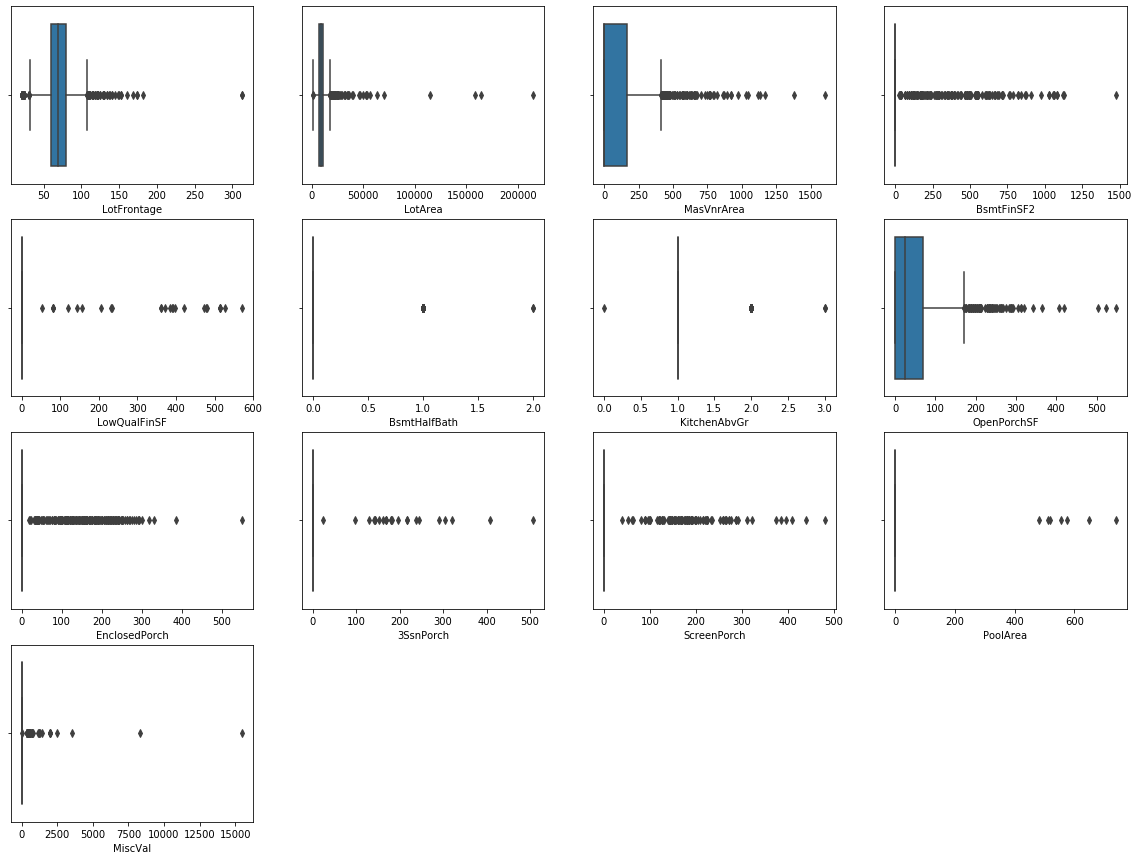

In [4372]:
plt.figure(figsize=(20,15))
j=1
percent_NA = 0
for i in range (0,len(skew_chk_grt_2)):
    plt.subplot(4, 4,j)
    sns.boxplot(df[skew_chk_grt_2.xs(i)['attribute']])
    j=j+1

In [4373]:
df.shape

(1460, 71)

Similarly, Check for the Skewness of Categorical Attributes

In [4374]:
Cat_obj = df.select_dtypes(include='object').columns
Cat_obj = Cat_obj.to_list()

Here we have coded to see if any Single Category having weitage over 80%

In [4375]:
Cat_obj_skew=[]
for i in range (0,len(Cat_obj)):
    skew_obj=(df[Cat_obj[i]]).value_counts(normalize=True).to_frame().reset_index()
    skew_obj.columns = ['attribute', 'skewness']
    a=skew_obj.sort_values(by='skewness',ascending=False).head(1)
    #print(a)
    if a.xs(0)['skewness']>.80:
        Cat_obj_skew.append([Cat_obj[i]])
Cat_obj_skew_gtr_80 = [y for x in Cat_obj_skew for y in x]

Draw all the plots for Categorical attributes where One Caregory having atleaset 80% weitage and drop them

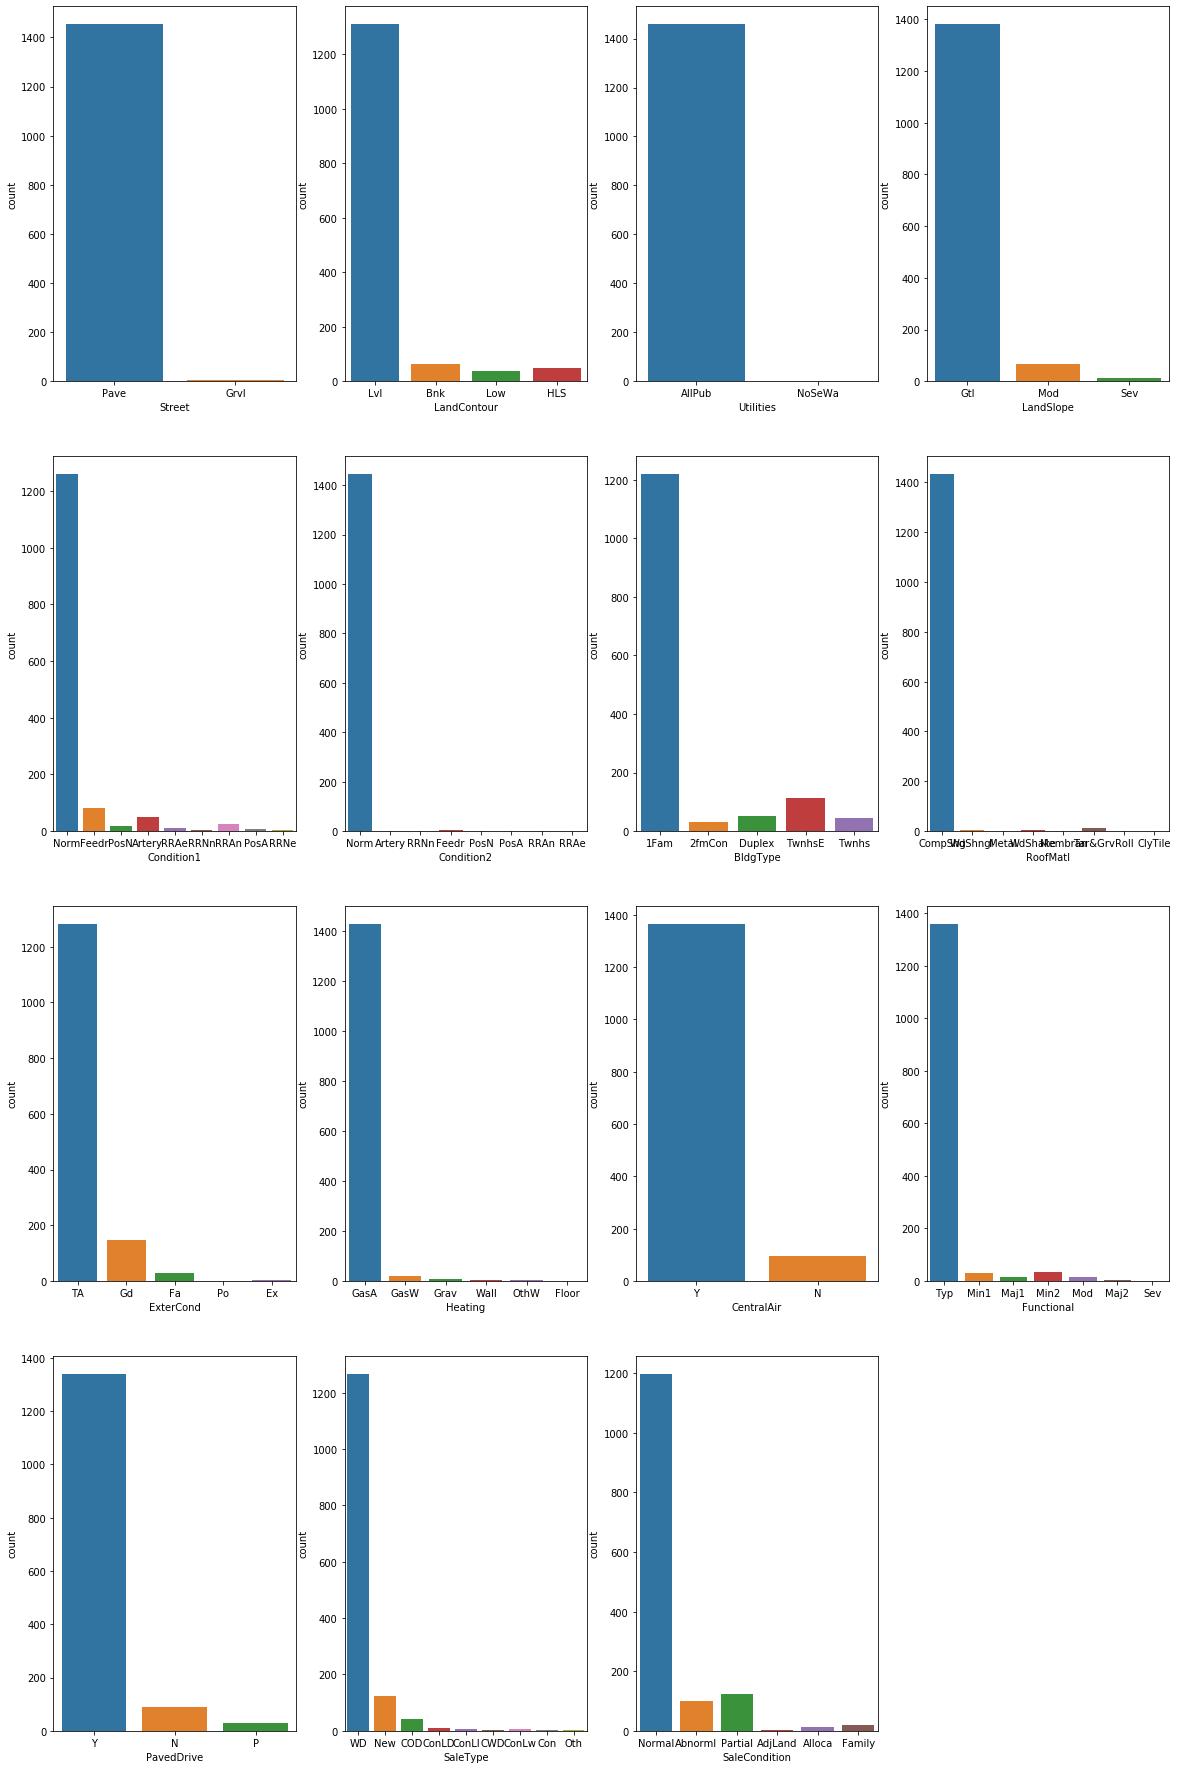

In [4376]:
plt.figure(figsize=(20,40))
j=1
for i in range (0,len(Cat_obj_skew_gtr_80)):
    plt.subplot(5, 4,j)
    sns.countplot(df[Cat_obj_skew_gtr_80[i]])
    j=j+1

In [4377]:
df.drop(Cat_obj_skew_gtr_80, axis=1, inplace=True)

Check the Shape of remaining items in DF

In [4378]:
df.shape

(1460, 56)

Check for the Ordinal Categories and chenge those to Numeric data.

In [4379]:
df['BsmtQual'] = df['BsmtQual'].map( {'Ex':5, 'Gd':4, 'TA':3 , 'Fa':2 , 'Po':1 , 'NA':0})
df['HeatingQC'] = df['HeatingQC'].map( {'Ex':5, 'Gd':4, 'TA':3 , 'Fa':2 , 'Po':1 })
df['KitchenQual'] = df['KitchenQual'].map( {'Ex':5, 'Gd':4, 'TA':3 , 'Fa':2 , 'Po':1})
df['ExterQual'] = df['ExterQual'].map( {'Ex':5, 'Gd':4, 'TA':3 , 'Fa':2 , 'Po':1, 'NA':0})
df['BsmtExposure'] = df['BsmtExposure'].map( {'Gd':4, 'Av':3, 'Mn':2 , 'No':1 , 'NA':0})

Similarly, change the non-ordinal Category to Non-Numerical Categories

In [4380]:
df['MSSubClass'] = df['MSSubClass'].map( {
         20 :'1-STORY 1946 & NEWER ALL STYLES'
        ,30:'1-STORY 1945 & OLDER'
        ,40:'1-STORY W/FINISHED ATTIC ALL AGES'
        ,45:'1-1/2 STORY - UNFINISHED ALL AGES'
        ,50:'1-1/2 STORY FINISHED ALL AGES'
        ,60:'2-STORY 1946 & NEWER'
        ,70:'2-STORY 1945 & OLDER'
        ,75:'2-1/2 STORY ALL AGES'
        ,80:'SPLIT OR MULTI-LEVEL'
        ,85:'SPLIT FOYER'
        ,90:'DUPLEX - ALL STYLES AND AGES'
       ,120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
       ,150:'1-1/2 STORY PUD - ALL AGES'
       ,160:'2-STORY PUD - 1946 & NEWER'
       ,180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
       ,190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

Combine multiple attributes to a single attribute having less percentage of skewness

In [4381]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = df['MSZoning'].value_counts(normalize=True)
df['MSZoning'] = np.where(df['MSZoning'].isin(s.index[s > 0.10]), df['MSZoning'], 'MSZoning_Oth')
df['MSZoning'].value_counts(normalize=True)

RL              0.788356
RM              0.149315
MSZoning_Oth    0.062329
Name: MSZoning, dtype: float64

In [4382]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = df['LotShape'].value_counts(normalize=True)
df['LotShape'] = np.where(df['LotShape'].isin(s.index[s > 0.10]), df['LotShape'], 'LotShape_Oth')
df['LotShape'].value_counts(normalize=True)

Reg             0.633562
IR1             0.331507
LotShape_Oth    0.034932
Name: LotShape, dtype: float64

In [4383]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = df['LotConfig'].value_counts(normalize=True)
df['LotConfig'] = np.where(df['LotConfig'].isin(s.index[s > 0.10]), df['LotConfig'], 'LotConfig_Oth')
df['LotConfig'].value_counts(normalize=True)

Inside           0.720548
Corner           0.180137
LotConfig_Oth    0.099315
Name: LotConfig, dtype: float64

In [4384]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = df['HouseStyle'].value_counts(normalize=True)
df['HouseStyle'] = np.where(df['HouseStyle'].isin(s.index[s > 0.10]), df['HouseStyle'], 'HouseStyle_Oth')
df['HouseStyle'].value_counts(normalize=True)

1Story            0.497260
2Story            0.304795
1.5Fin            0.105479
HouseStyle_Oth    0.092466
Name: HouseStyle, dtype: float64

In [4385]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = df['Exterior1st'].value_counts(normalize=True)
df['Exterior1st'] = np.where(df['Exterior1st'].isin(s.index[s > 0.05]), df['Exterior1st'], 'Exterior1st_Oth')
df['Exterior1st'].value_counts(normalize=True)

VinylSd            0.352740
HdBoard            0.152055
MetalSd            0.150685
Wd Sdng            0.141096
Exterior1st_Oth    0.129452
Plywood            0.073973
Name: Exterior1st, dtype: float64

In [4386]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = df['Exterior2nd'].value_counts(normalize=True)
df['Exterior2nd'] = np.where(df['Exterior2nd'].isin(s.index[s > 0.05]), df['Exterior2nd'], 'Exterior2nd_Oth')
df['Exterior2nd'].value_counts(normalize=True)

VinylSd            0.345205
MetalSd            0.146575
HdBoard            0.141781
Wd Sdng            0.134932
Exterior2nd_Oth    0.134247
Plywood            0.097260
Name: Exterior2nd, dtype: float64

In [4387]:
# Combine multiple attributes to a single attribute having less percentage of skewness
s = df['Foundation'].value_counts(normalize=True)
df['Foundation'] = np.where(df['Foundation'].isin(s.index[s > 0.05]), df['Foundation'], 'Foundation_Oth')
df['Foundation'].value_counts(normalize=True)

PConc             0.443151
CBlock            0.434247
BrkTil            0.100000
Foundation_Oth    0.022603
Name: Foundation, dtype: float64

Plot ans see the relationship between Dependent Variables and Independent Variables. Only few attributes are included here for sample checks.

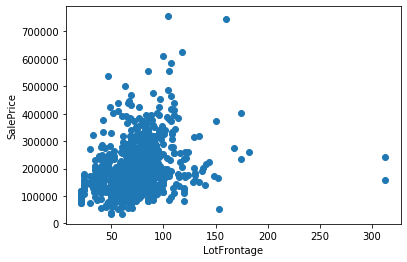

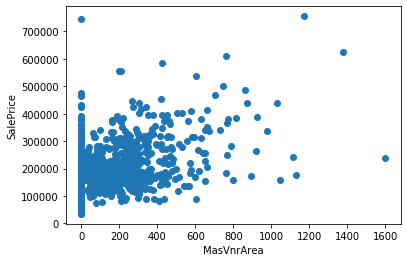

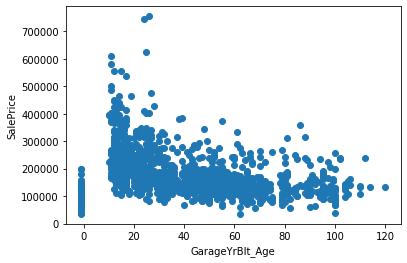

In [4388]:
chk_rel = df.select_dtypes(include='float').columns
chk_rel = chk_rel.to_list()

for i in range (0,len(chk_rel)):
    plt.scatter(df[chk_rel[i]],df["SalePrice"])
    plt.xlabel(chk_rel[i])
    plt.ylabel("SalePrice")
    plt.show()
    j=j+1

Create Dummies for retained categorical Objects

In [4389]:
dummy_obj = df.select_dtypes(include='object').columns
dummy_obj = dummy_obj.to_list()

In [4390]:
for i in range (0,len(dummy_obj)):
    dummy=pd.get_dummies(df[dummy_obj[i]],prefix=dummy_obj[i]).iloc[:,:-1]
    df=pd.concat([df,dummy],axis=1)
    df=df.drop(dummy_obj[i],axis=1)

In [4391]:
df.shape

(1460, 125)

In [4392]:
df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'BsmtFinType1_Rec', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_NA',
       'GarageFinish_RFn'],
      dtype='object', length=125)

# Step 2 - Data Split in X and y 

Steps

1. Data Split
2. Transform y to Log 

Check the Data Distribution of Target Variable

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text xticklabel objects>)

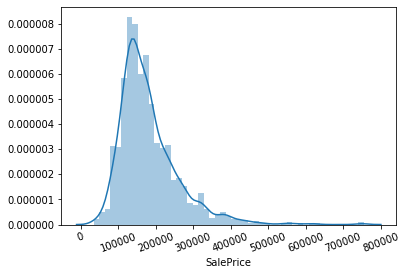

In [4393]:
sns.distplot(df['SalePrice'])
plt.xticks(rotation = 20)

Split the data in X and y and convert Target Variable to Log to make sure its Normally Distributed

In [4394]:
# split into X and y
X = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']

In [4395]:
y = np.log1p(y)

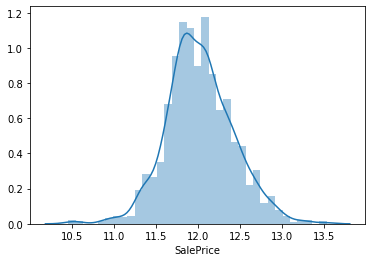

In [4396]:
sns.distplot(y)

# Step 3 - Model Building

Steps -

1. Test Train Split
2. Sclaing of Test and Train data
3. Check Correlation
4. Peform VIF and check for Top#50 attributes
4. Bulding Ridge Model
5. Building Lasso Model

Test - Train Split

In [4397]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

Performing Sclaing on Continuous attributes

In [4398]:
float_var = X_train.select_dtypes(include='float').columns
int_var = X_train.select_dtypes(include='int64').columns

In [4399]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[float_var] = scaler.fit_transform(X_train[float_var])
X_train[int_var] = scaler.fit_transform(X_train[int_var])

X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,GarageYrBlt_Age,YrSold_Age,YearBuilt_Age,YearRemodAdd_Age,MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSZoning_MSZoning_Oth,MSZoning_RL,LotShape_IR1,LotShape_LotShape_Oth,LotConfig_Corner,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_Exterior1st_Oth,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior2nd_Exterior2nd_Oth,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,Foundation_BrkTil,Foundation_CBlock,Foundation_Foundation_Oth,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn
210,-0.115302,-0.473765,-0.779861,0.383154,-0.557997,-0.698260,-0.532226,-0.605626,0.043512,-0.293313,-0.374367,-0.430911,-1.179071,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.776063,-0.935650,-0.925422,-0.983487,-2.366798,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-1.540899,-0.134653,1.524903,1.694350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
318,0.926898,-0.056845,0.649651,-0.533005,0.809148,1.053395,0.579028,2.146648,1.160345,-0.293313,-0.454644,0.621579,0.873498,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,0.741868,1.556976,0.623522,0.659950,1.645101,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-0.457735,-0.881833,-0.717033,-0.390956,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
239,-0.794998,-0.169324,-0.065105,-1.449164,-0.557997,-0.698260,-0.532226,-0.605626,-0.761296,-0.293313,0.171964,-0.712011,-1.179071,-0.930972,0.795996,-0.124502,-0.056465,-0.837450,-0.247791,-1.026085,1.246998,0.176772,-0.234155,-0.776063,0.310663,0.623522,1.207763,-1.029498,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,1.244382,-1.629012,0.865510,1.694350,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,

Lets Check for Highly correlated attributes

In [4400]:
corr= X_train.loc[:, X_train.dtypes!=np.object].corr()

Pick attributes with correlation more than .7 - High-Positive Correlated

In [4401]:
corrdf=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns =  ['VAR1','VAR2','CORELATION']
corrdf.dropna(subset=['CORELATION'],inplace=True)
corr_top10_Positive=corrdf.sort_values('CORELATION',ascending=False)
corr_top10_Negative=corrdf.sort_values('CORELATION',ascending=True)
corr_top10_Positive[corr_top10_Positive['CORELATION']>.7]

,VAR1,VAR2,CORELATION
12495,Exterior2nd_MetalSd,Exterior1st_MetalSd,0.978826
12745,Exterior2nd_VinylSd,Exterior1st_VinylSd,0.973847
10582,HouseStyle_1.5Fin,MSSubClass_1-1/2 STORY FINISHED ALL AGES,0.927742
3499,GarageArea,GarageCars,0.890243
12370,Exterior2nd_HdBoard,Exterior1st_HdBoard,0.869566
3249,FireplaceQu,Fireplaces,0.864212
1623,1stFlrSF,TotalBsmtSF,0.816297
2992,TotRmsAbvGrd,GrLivArea,0.808463
10802,HouseStyle_2Story,2ndFlrSF,0.807479
12245,Exterior2nd_Exterior2nd_Oth,Exterior1st_Exterior1st_Oth,0.789255


Pick attributes with correlation less than -.7 - High-Negative Correlated

In [4402]:
corr_top10_Negative[corr_top10_Negative['CORELATION']<-.7]

,VAR1,VAR2,CORELATION
11373,RoofStyle_Hip,RoofStyle_Gable,-0.942500
13124,MasVnrType_None,MasVnrType_BrkFace,-0.799311
10678,HouseStyle_1Story,2ndFlrSF,-0.775245
7499,LotConfig_Inside,LotConfig_Corner,-0.764642
14996,GarageType_Detchd,GarageType_Attchd,-0.726289


Lets make it easier for Model by manually dropping highly correlated variables.

In [4403]:
X_train = X_train.drop(['Exterior2nd_MetalSd',
'Exterior2nd_VinylSd',
'HouseStyle_1.5Fin',
'GarageArea',
'Exterior2nd_HdBoard',
'1stFlrSF',
'TotRmsAbvGrd',
'HouseStyle_2Story',
'Exterior2nd_Exterior2nd_Oth',
'HouseStyle_1Story',
'HouseStyle_2Story',
'Exterior2nd_Plywood',
'MSSubClass_DUPLEX - ALL STYLES AND AGES',
'KitchenQual',
'Neighborhood_Somerst',
'RoofStyle_Hip',
'FireplaceQu',
'MasVnrType_None',
'HouseStyle_1Story',
'LotConfig_Inside',
'GarageType_Detchd',
'ExterQual'                   
], axis = 1)

In [4404]:
X_train.shape

(1021, 104)

Perform RFE and select top #50 features

In [4405]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

rfe = RFE(model_1, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [4406]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars',
       'YearBuilt_Age', 'YearRemodAdd_Age', 'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSZoning_MSZoning_Oth', 'Neighborhood_Blmngtn', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'RoofStyle_Mansard',

In [4407]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col]

Scale Test Variables

In [4408]:
X_test = X_test[col]
X_test.head()

,OverallQual,OverallCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GrLivArea,BsmtFullBath,Fireplaces,GarageCars,YearBuilt_Age,YearRemodAdd_Age,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSZoning_MSZoning_Oth,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,RoofStyle_Mansard,Foundation_BrkTil,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageFinish_Fin,GarageFinish_RFn
1436,4,6,3,616,0,248,864,0,0,2,49,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
57,7,5,4,0,0,860,1720,0,0,2,16,16,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
780,7,5,4,0,0,1237,1253,0,1,2,25,24,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
382,7,5,4,0,0,939,1797,0,0,2,14,14,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1170,6,6,3,522,0,574,1118,1,1,1,43,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [4409]:
int_var_X_test = X_test.select_dtypes(include='int64').columns
int_var_X_test

Index(['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars',
       'YearBuilt_Age', 'YearRemodAdd_Age'],
      dtype='object')

In [4410]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_test[int_var_X_test] = scaler.fit_transform(X_test[int_var_X_test])

X_test.head()

,OverallQual,OverallCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GrLivArea,BsmtFullBath,Fireplaces,GarageCars,YearBuilt_Age,YearRemodAdd_Age,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSZoning_MSZoning_Oth,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,RoofStyle_Mansard,Foundation_BrkTil,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageFinish_Fin,GarageFinish_RFn
1436,-1.574844,0.377745,-0.624812,0.420867,-0.281532,-0.769869,-1.268092,-0.778198,-1.011862,0.321299,0.008329,0.660525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
57,0.657459,-0.483986,0.596918,-0.996087,-0.281532,0.667564,0.410443,-0.778198,-1.011862,0.321299,-1.096127,-0.934135,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
780,0.657459,-0.483986,0.596918,-0.996087,-0.281532,1.553042,-0.505300,-0.778198,0.548686,0.321299,-0.794912,-0.547551,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
382,0.657459,-0.483986,0.596918,-0.996087,-0.281532,0.853115,0.561432,-0.778198,-1.011862,0.321299,-1.163063,-1.030781,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1170,-0.086642,0.377745,-0.624812,0.204644,-0.281532,-0.004177,-0.770022,1.215081,0.548686,-1.018978,-0.192481,0.370587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


## Ridge Regression

Start Model Building with defining Model Parameters

In [4411]:
from sklearn.model_selection import KFold

# list of alphas to tune
params = {'alpha': [0.00001 ,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}

ridge = Ridge()

# cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [4412]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002910,0.001845,0.000686,0.000406,1e-05,{'alpha': 1e-05},-0.101494,-0.094991,-0.097476,-0.089435,-0.103649,-0.097413,0.005000,20,-0.092116,-0.090827,-0.092939,-0.085513,-0.089809,-0.090241,0.002595
1,0.001037,0.000938,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.101494,-0.094991,-0.097476,-0.089435,-0.103649,-0.097413,0.005000,19,-0.092116,-0.090827,-0.092939,-0.085513,-0.089809,-0.090241,0.002595
2,0.001813,0.003625,0.001129,0.002258,0.001,{'alpha': 0.001},-0.101490,-0.094990,-0.097475,-0.089434,-0.103648,-0.097411,0.005000,18,-0.092114,-0.090826,-0.092938,-0.085512,-0.089807,-0.090240,0.002595
3,0.003304,0.003661,0.000208,0.000416,0.01,{'alpha': 0.01},-0.101455,-0.094980,-0.097464,-0.089420,-0.103638,-0.097395,0.004997,17,-0.092101,-0.090821,-0.092927,-0.085503,-0.089797,-0.090230,0.002594
4,0.001838,0.002788,0.001801,0.003128,0.05,{'alpha': 0.05},-0.101299,-0.094937,-0.097415,-0.089359,-0.103598,-0.097325,0.004985,16,-0.092047,-0.090797,-0.092882,-0.085468,-0.089751,-0.090189,0.002591


Plot neg_mean_absolute_error

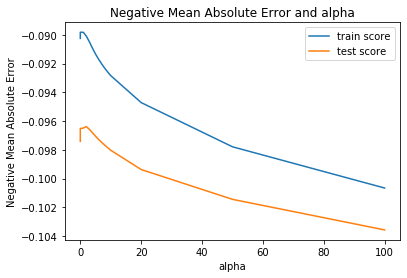

In [4413]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

From above 5 looks Optimal Value for Alpha.

Lets try it and find the coefficients

In [4414]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.09063248,  0.04723217,  0.02601146, -0.00370193,  0.00604953,
        0.01180182,  0.1278648 ,  0.02773719,  0.03480081,  0.05130471,
       -0.06497504, -0.02762114, -0.07399202, -0.08252432, -0.04183193,
       -0.17488496, -0.10604804, -0.0181841 , -0.07265233, -0.09947209,
       -0.0649295 , -0.05918247, -0.1289629 , -0.08008678, -0.17088851,
       -0.13912104, -0.08246712, -0.0767771 , -0.05171662, -0.09396769,
        0.06277032, -0.13474025, -0.04991453, -0.10323902, -0.07188703,
        0.0487971 , -0.02638881,  0.02937248, -0.02669887,  0.05903883,
        0.05713801,  0.06281801,  0.02173677,  0.03686083, -0.0157805 ,
       -0.04624074, -0.0323259 , -0.06118442,  0.05368053,  0.03552432])

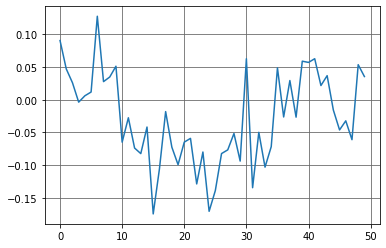

In [4415]:
plt.plot(ridge.coef_)
plt.grid(b=True, which='major', color='#666666', linestyle='-')

In [4416]:
from sklearn.metrics import mean_absolute_error
lm = Ridge(alpha=5)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('R2 Score Train : ', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('R2 Score Test  : ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('MAE Train      :', mean_absolute_error(y_train, y_train_pred))
print('MAE Test       :', mean_absolute_error(y_test, y_test_pred))

R2 Score Train :  0.887042572812005
R2 Score Test  :  0.8819027491128276
MAE Train      : 0.09165208803061144
MAE Test       : 0.09761650791776558


In [4417]:
# Ridge model parameters
import operator 
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
zipped=list(zip(cols, model_parameters))

res = sorted(zipped, key = operator.itemgetter(1))
res

[('MSSubClass_2-STORY PUD - 1946 & NEWER', -0.175),
 ('Neighborhood_IDOTRR', -0.171),
 ('Neighborhood_MeadowV', -0.139),
 ('Neighborhood_OldTown', -0.135),
 ('Neighborhood_Edwards', -0.129),
 ('MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', -0.106),
 ('Neighborhood_Sawyer', -0.103),
 ('Neighborhood_BrDale', -0.099),
 ('Neighborhood_NWAmes', -0.094),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.083),
 ('Neighborhood_Mitchel', -0.082),
 ('Neighborhood_Gilbert', -0.08),
 ('Neighborhood_NAmes', -0.077),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.074),
 ('Neighborhood_Blmngtn', -0.073),
 ('Neighborhood_SawyerW', -0.072),
 ('YearBuilt_Age', -0.065),
 ('Neighborhood_BrkSide', -0.065),
 ('GarageType_CarPort', -0.061),
 ('Neighborhood_CollgCr', -0.059),
 ('Neighborhood_NPkVill', -0.052),
 ('Neighborhood_SWISU', -0.05),
 ('GarageType_Basment', -0.046),
 ('MSSubClass_2-STORY 1946 & NEWER', -0.042),
 ('GarageType_BuiltIn', -0.032),
 ('YearRemodAdd_Age', -0.028),
 ('F

#### Tp #10 Coefficients for Ridge -

MSSubClass_2-STORYPUD-1946&NEWER 

Neighborhood_IDOTRR

Neighborhood_MeadowV

Neighborhood_OldTown

Neighborhood_Edwards

BsmtFinType1_ALQ

Neighborhood_NridgHt

BsmtFinType1_GLQ

OverallQual

GrLivArea

Error Terms - Y Train and Y Train Pred

Text(0.5, 0, 'Errors')

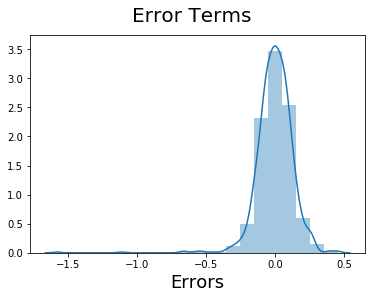

In [4418]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error Terms - Y Test and Y Test Pred

Text(0.5, 0, 'Errors')

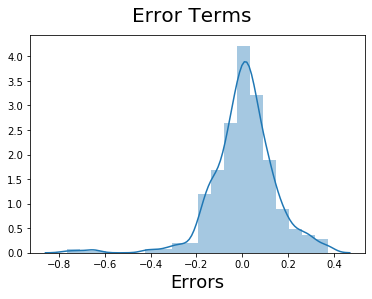

In [4419]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Y Test Vs. Y Test Pred looks Linear

Text(0, 0.5, 'y_test_pred')

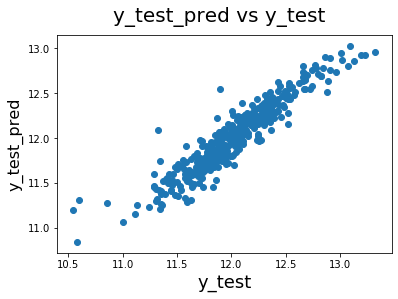

In [4420]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test_pred vs y_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

Y Train Vs. Y Train Pred looks Linear

Text(0, 0.5, 'y_train_pred')

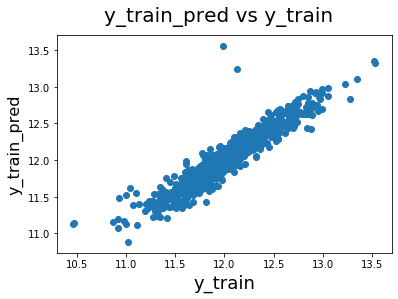

In [4421]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train_pred vs y_train', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

## Lasso Regression

In [4422]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [4423]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002697,0.001799,0.002314,0.002892,1e-05,{'alpha': 1e-05},-0.101347,-0.094920,-0.097435,-0.089322,-0.103619,-0.097333,0.005012,2,-0.092036,-0.090785,-0.092877,-0.085468,-0.089731,-0.090179,0.002588
1,0.001534,0.003067,0.000199,0.000399,0.0001,{'alpha': 0.0001},-0.100146,-0.094378,-0.097137,-0.088529,-0.103393,-0.096720,0.005078,1,-0.091444,-0.090528,-0.092389,-0.085291,-0.089235,-0.089777,0.002473
2,0.002923,0.002850,0.002539,0.003293,0.001,{'alpha': 0.001},-0.099803,-0.099855,-0.098756,-0.092848,-0.110453,-0.100342,0.005679,3,-0.096037,-0.095707,-0.097218,-0.091585,-0.094953,-0.095100,0.001903
3,0.001063,0.001303,0.000561,0.000783,0.01,{'alpha': 0.01},-0.114491,-0.106574,-0.108966,-0.095108,-0.124723,-0.109977,0.009707,4,-0.109694,-0.107984,-0.111022,-0.102436,-0.108753,-0.107978,0.002950
4,0.000399,0.000489,0.000974,0.001947,0.05,{'alpha': 0.05},-0.136980,-0.126902,-0.124497,-0.114101,-0.153557,-0.131213,0.013329,5,-0.130834,-0.128976,-0.132371,-0.123739,-0.130266,-0.129237,0.002957


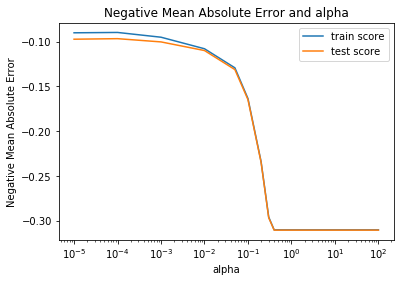

In [4424]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Now we have some choices.

If taking alpha as .01 then Lasso making 38 cofficients as 0 but compromising R2 Score by 5%

If taking alpha as .0005 then Lasso making 7 cofficients as 0 with good R2 Score

If taking alpha as .001 then Lasso making 12 cofficients as 0 with MAE going over 10

If taking alpha as .0001 then Lasso making only 1 cofficient as 0 but enhacning R2 Score by only 1%

Lets settle for .0005

In [4425]:
alpha = .0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Can see that Lasso making number of coefficients as 0

In [4426]:
lasso.coef_

array([ 0.0916039 ,  0.04800853,  0.02725278,  0.        ,  0.00743533,
        0.00944955,  0.12831934,  0.02770158,  0.03421937,  0.05050032,
       -0.06405561, -0.02705216, -0.06417892, -0.07788271, -0.04055944,
       -0.19461899, -0.09618427, -0.00047889, -0.0485282 , -0.07141421,
       -0.06124374, -0.04888003, -0.12771263, -0.07194281, -0.19125525,
       -0.15490027, -0.07240005, -0.06793076, -0.        , -0.08250466,
        0.06648848, -0.13958219, -0.04037858, -0.09833549, -0.06300542,
        0.03371727, -0.        ,  0.        , -0.02408538,  0.04057968,
        0.04028789,  0.04901283,  0.        ,  0.0167749 , -0.        ,
       -0.01977111, -0.02384489, -0.02676845,  0.04497985,  0.02936087])

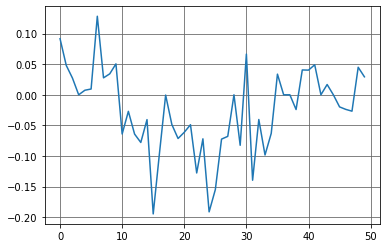

In [4427]:
plt.plot(lasso.coef_)
plt.grid(b=True, which='major', color='#666666', linestyle='-')

Lets check final list of attributes and their coefficient values

In [4428]:
# lasso model parameters
import operator 
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
zipped=list(zip(cols, model_parameters))

res = sorted(zipped, key = operator.itemgetter(1))
res

[('MSSubClass_2-STORY PUD - 1946 & NEWER', -0.195),
 ('Neighborhood_IDOTRR', -0.191),
 ('Neighborhood_MeadowV', -0.155),
 ('Neighborhood_OldTown', -0.14),
 ('Neighborhood_Edwards', -0.128),
 ('Neighborhood_Sawyer', -0.098),
 ('MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', -0.096),
 ('Neighborhood_NWAmes', -0.083),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.078),
 ('Neighborhood_Gilbert', -0.072),
 ('Neighborhood_Mitchel', -0.072),
 ('Neighborhood_BrDale', -0.071),
 ('Neighborhood_NAmes', -0.068),
 ('YearBuilt_Age', -0.064),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.064),
 ('Neighborhood_SawyerW', -0.063),
 ('Neighborhood_BrkSide', -0.061),
 ('Neighborhood_Blmngtn', -0.049),
 ('Neighborhood_CollgCr', -0.049),
 ('MSSubClass_2-STORY 1946 & NEWER', -0.041),
 ('Neighborhood_SWISU', -0.04),
 ('YearRemodAdd_Age', -0.027),
 ('GarageType_CarPort', -0.027),
 ('Foundation_BrkTil', -0.024),
 ('GarageType_BuiltIn', -0.024),
 ('GarageType_Basment', -0.02),
 ('BsmtF

#### Top #10 Cofficients for Lasso -

MSSubClass_2-STORYPUD-1946&NEWER

Neighborhood_IDOTRR

Neighborhood_MeadowV

Neighborhood_OldTown

Neighborhood_Edwards

BsmtFinType1_GLQ

GarageCars

Neighborhood_NridgHt

OverallQual

GrLivArea

R2 Scores for alpha .0005

In [4429]:
# lasso regression
lm = Lasso(alpha=.0005)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('R2 Score Train : ', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('R2 Score Test  : ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('MAE Train      :', mean_absolute_error(y_train, y_train_pred))
print('MAE Test       :', mean_absolute_error(y_test, y_test_pred))

R2 Score Train :  0.8852918998693525
R2 Score Test  :  0.8812639108447513
MAE Train      : 0.09214053760118783
MAE Test       : 0.09790708656683443


Error Terms - y_train - y_train_pred looks normally distributed

Text(0.5, 0, 'Errors')

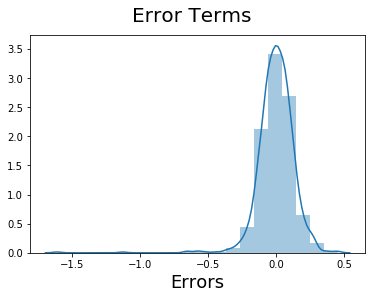

In [4430]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error Terms - y_test - y_test_pred looks normally distributed

Text(0.5, 0, 'Errors')

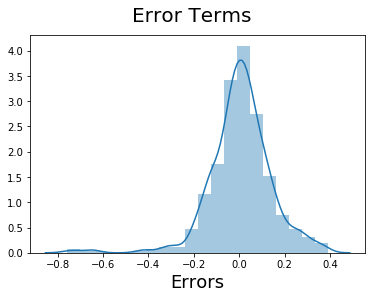

In [4431]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

y_train_pred vs y_train - can see Linear relationship

Text(0, 0.5, 'y_train_pred')

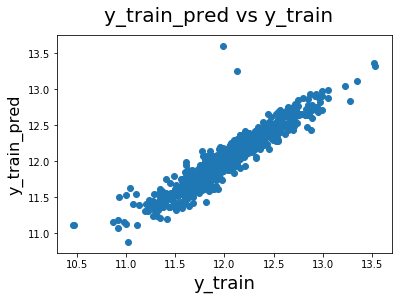

In [4432]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train_pred vs y_train', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

y_test_pred vs y_test - can see Linear relationship

Text(0, 0.5, 'y_test')

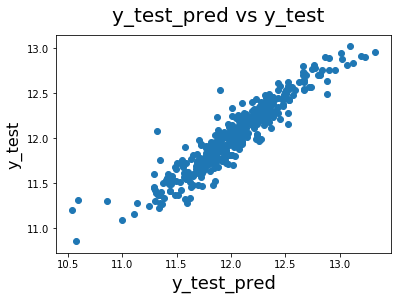

In [4433]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test_pred vs y_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test_pred', fontsize=18)                          # X-label
plt.ylabel('y_test', fontsize=16)                          # Y-label

# Conclusion

From the above Model building approach we can see that -

From the below table we see that for both Ridge and Lasso we got almost same results but having slight higher in Lasso.
The better model would be Lasso as its taking only 43 attributes to explain y and giving higher R2 score, lower MAE. Hence Feature elimination hold the key here.

Even though R2 is little lower, Lasso would be better as its making a less complex model by reducing number of attributes. We can further fine-tune it and reduce the number of coefficients to 0 for even more attributes with trade-off between R2 Score and No. of attributes.

Lasso Regression - Final stats

Alpha	0.0005

R2 Score Train	0.8852919

R2 Score Test	0.881263911

MAE Train	0.092140538

MAE Test	0.097907087

Number Of Coefficients	43

#### Top #10 Contributors -

MSSubClass_2-STORYPUD-1946&NEWER
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_OldTown
Neighborhood_Edwards
BsmtFinType1_GLQ
GarageCars
Neighborhood_NridgHt
OverallQual
GrLivArea

Here the prediction can be done as -

#### If Neighbourhood is among IDOTRR, MeadowV , OldTown and Edwards , prices will be lower. However for NridgHt, price would be on higher end.

#### For 2-STORY 1946 & NEWER dwelling prices will be lower

#### If Rating of basement finished area is good then prices would be higher.

#### Size of garage in car capacity contributing in high rise of prise as well.

#### Rates the overall material and finish of the house (OverallQual) is important feature to make price higher.

#### Above grade (ground) living area square feet (GrLivArea) is most important feature for high price.

#### Equation

y= (-0.195)*MSSubClass_2-STORYPUD-1946&NEWER  +
   (-0.191)*Neighborhood_IDOTRR   +
   (-0.155)*Neighborhood_MeadowV  +
   (-0.14)*Neighborhood_OldTown   +
   (-0.128)*Neighborhood_Edwards  +
   (0.049)* BsmtFinType1_GLQ      +
   (0.051)*GarageCars             +
   (0.066)* Neighborhood_NridgHt  +
   (0.092)*OverallQual            +
   (0.128)*GrLivArea              + 
   Other attributes               +
   12.066



### Just for Model Building. Explanation given in Subjectve submission

### Question 3


After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [4434]:
X_train.drop(['GrLivArea','Neighborhood_OldTown','Neighborhood_MeadowV','Neighborhood_IDOTRR','MSSubClass_2-STORY PUD - 1946 & NEWER'], axis=1, inplace=True)

In [4435]:
X_test.drop(['GrLivArea','Neighborhood_OldTown','Neighborhood_MeadowV','Neighborhood_IDOTRR','MSSubClass_2-STORY PUD - 1946 & NEWER'], axis=1, inplace=True)

In [4436]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [4437]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003233,0.000797,0.001295,0.000525,1e-05,{'alpha': 1e-05},-0.117385,-0.116567,-0.107882,-0.112292,-0.121834,-0.115194,0.004745,2,-0.110630,-0.107510,-0.111166,-0.103689,-0.106482,-0.107896,0.002757
1,0.003734,0.003128,0.000194,0.000387,0.0001,{'alpha': 0.0001},-0.116546,-0.116238,-0.107755,-0.112128,-0.122223,-0.114980,0.004832,1,-0.110541,-0.107473,-0.110962,-0.103762,-0.106615,-0.107871,0.002657
2,0.002922,0.003287,0.000199,0.000399,0.001,{'alpha': 0.001},-0.115982,-0.119230,-0.110512,-0.114354,-0.128219,-0.117658,0.005977,3,-0.114875,-0.111766,-0.114548,-0.109016,-0.111826,-0.112406,0.002141
3,0.000000,0.000000,0.001608,0.003217,0.01,{'alpha': 0.01},-0.128613,-0.134822,-0.121372,-0.122173,-0.148407,-0.131075,0.009934,4,-0.131452,-0.127898,-0.131399,-0.122618,-0.127561,-0.128186,0.003239
4,0.000399,0.000489,0.000000,0.000000,0.05,{'alpha': 0.05},-0.149550,-0.151938,-0.140432,-0.135209,-0.172952,-0.150016,0.012963,5,-0.149708,-0.147346,-0.150769,-0.145946,-0.146050,-0.147964,0.001951


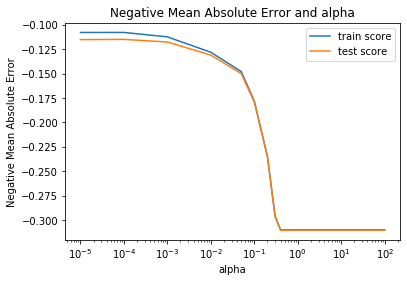

In [4438]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [4439]:
alpha =.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [4440]:
lasso.coef_

array([ 1.34596798e-01,  3.77998165e-02, -1.86662051e-04,  7.07215793e-02,
        2.98383301e-02,  7.63695510e-02,  2.37359705e-02,  5.39023038e-02,
        6.83384308e-02, -2.46773965e-02, -3.95991849e-02, -1.98405220e-01,
       -8.26807286e-02,  1.13348160e-01, -1.58724363e-01, -1.58837039e-02,
       -5.51146735e-02, -1.76381782e-01, -0.00000000e+00, -3.47913013e-02,
       -4.50139006e-02, -7.35642930e-02, -2.88279923e-02, -3.96540129e-02,
       -4.42639496e-02, -4.82328425e-02,  3.82655827e-02,  8.07908936e-02,
       -4.32513746e-02, -1.69238336e-02,  1.53820774e-02, -0.00000000e+00,
        3.55840163e-02, -2.99221759e-02,  3.42544338e-02,  3.60096150e-02,
        5.24345570e-02,  1.77279509e-02,  3.10944801e-02, -0.00000000e+00,
       -0.00000000e+00,  3.22845400e-02, -3.09089147e-02,  6.08251726e-02,
        3.16548035e-02])

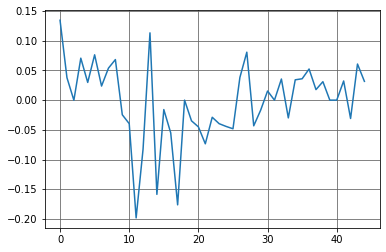

In [4441]:
plt.plot(lasso.coef_)
plt.grid(b=True, which='major', color='#666666', linestyle='-')

In [4442]:
# lasso model parameters
import operator 
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
zipped=list(zip(cols, model_parameters))

res = sorted(zipped, key = operator.itemgetter(1))
res

[('MSSubClass_1-STORY 1945 & OLDER', -0.198),
 ('Neighborhood_BrDale', -0.176),
 ('MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', -0.159),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.083),
 ('Neighborhood_Gilbert', -0.074),
 ('Neighborhood_Blmngtn', -0.055),
 ('Neighborhood_NWAmes', -0.048),
 ('Neighborhood_Edwards', -0.045),
 ('Neighborhood_NPkVill', -0.044),
 ('Neighborhood_Sawyer', -0.043),
 ('YearRemodAdd_Age', -0.04),
 ('Neighborhood_NAmes', -0.04),
 ('Neighborhood_CollgCr', -0.035),
 ('GarageType_CarPort', -0.031),
 ('Foundation_BrkTil', -0.03),
 ('Neighborhood_Mitchel', -0.029),
 ('YearBuilt_Age', -0.025),
 ('Neighborhood_SawyerW', -0.017),
 ('MSZoning_MSZoning_Oth', -0.016),
 ('BsmtQual', -0.0),
 ('Neighborhood_BrkSide', -0.0),
 ('Neighborhood_Timber', -0.0),
 ('GarageType_2Types', -0.0),
 ('GarageType_Basment', -0.0),
 ('Neighborhood_StoneBr', 0.015),
 ('BsmtFinType1_LwQ', 0.018),
 ('BsmtFullBath', 0.024),
 ('BsmtFinSF2', 0.03),
 ('BsmtFinTyp

In [4443]:
# lasso regression
lm = Lasso(alpha=.0005)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('R2 Score Train : ', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('R2 Score Test  : ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('MAE Train      :', mean_absolute_error(y_train, y_train_pred))
print('MAE Test       :', mean_absolute_error(y_test, y_test_pred))


R2 Score Train :  0.8420098805995357
R2 Score Test  :  0.8363117318138032
MAE Train      : 0.1100020587693753
MAE Test       : 0.11622703858143549


Text(0.5, 0, 'Errors')

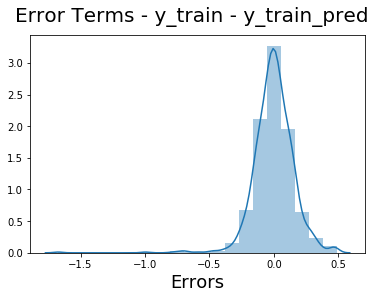

In [4444]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms - y_train - y_train_pred', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

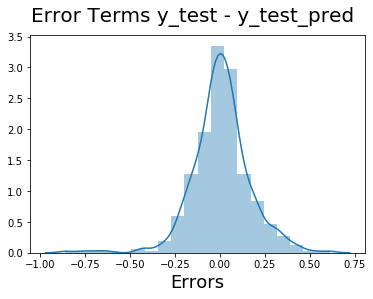

In [4445]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms y_test - y_test_pred', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_test_pred')

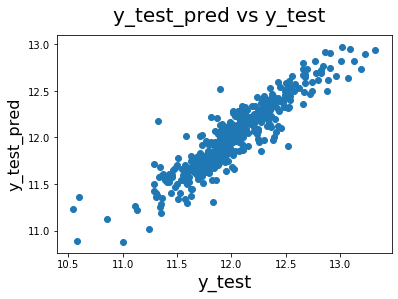

In [4446]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test_pred vs y_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_train')

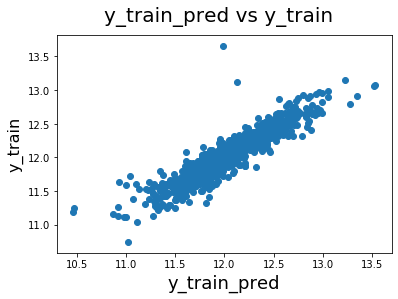

In [4447]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train_pred vs y_train', fontsize=20)              # Plot heading 
plt.xlabel('y_train_pred', fontsize=18)                          # X-label
plt.ylabel('y_train', fontsize=16)                          # Y-label